# Projeto de Análise de Distribuição Georreferenciada das Redações Nota Mil no ENEM 2022 no Brasil

O objetivo principal deste projeto é realizar uma análise georreferenciada da distribuição das redações com nota mil no Exame Nacional do Ensino Médio (ENEM) de 2022 em todo o território brasileiro. O nosso propósito é compreender em quais regiões e municípios do Brasil esses estudantes estão concentrados e investigar os possíveis motivos que explicam essa concentração em áreas específicas.

Para atingir esse objetivo, iremos seguir as seguintes etapas:

1. Coleta de Dados: Inicialmente, iremos coletar os microdados do INEP referentes aos alunos que obtiveram nota máxima na redação do ENEM 2022.

2. Georreferenciamento de Escolas: Vamos georreferenciar as escolas em que esses alunos estudam, transformando os locais em pontos no mapa para visualização e análise.

3. Agrupamento por Município: Após georreferenciar as escolas, iremos agrupá-las por município, criando áreas de concentração para uma análise mais detalhada.

4. Correlação Geoespacial: Faremos uma análise estatística para identificar possíveis correlações geoespaciais entre a localização das escolas com alunos nota mil e características geográficas, socioeconômicas ou culturais das regiões.

5. Investimento x Quantidade de Alunos: A última etapa consistirá em buscar justificativas para a concentração desses alunos nota mil em determinadas áreas, relacionando o investimento em educação e outros fatores com a quantidade de alunos bem-sucedidos.

Os dados serão analisados de forma aprofundada, buscando identificar tendências e padrões que possam auxiliar na compreensão desse fenômeno. Este projeto visa contribuir para uma melhor compreensão da distribuição das notas máximas nas redações do ENEM e fornecer insights valiosos para aprimorar o sistema educacional brasileiro.

## Instalações

In [3]:
!pip install geopandas scikit-gstat osmnx contextily keplergl --quiet

^C


In [135]:
# !pip install dash --quiet
# !pip install leafmap

In [134]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx

## Coletando Dados

In [118]:
path = 'MICRODADOS_SARESP_2022_0.csv'
# microdados_Enem = spark.read\
#                 .csv(path, header = True, inferSchema = True)

In [119]:
dados = pd.read_csv(path, encoding='UTF-8', delimiter = ";")
dados

,CD_ALUNO,NOMEDEP,NomeDepBol,RegiaoMetropolitana,CDREDE,DE,CODMUN,MUN,CODESC,TIPOCLASSE,...,profic_lp,profic_mat,profic_cie,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie,classific_lp,classific_mat,classific_cie,validade
0,54425,ESTADUAL-SE,Rede Estadual,Interior,20803,BIRIGUI,230,BURITAMA,30132,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,290674,ESTADUAL-SE,Rede Estadual,Interior,20909,MIRANTE DO PARANAPANEMA,686,TARABAI,32759,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,352167,ESTADUAL-OUT,Centro Paula Souza,Interior,20803,BIRIGUI,214,BIRIGUI,266887,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,415917,ESTADUAL-SE,Rede Estadual,Região Metropolitana do Vale do Paraíba e Lito...,20204,PINDAMONHANGABA,528,PINDAMONHANGABA,13201,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,422500,ESTADUAL-SE,Rede Estadual,Interior,20501,ARARAQUARA,794,TRABIJU,21921,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332567,38933163,MUNICIPAL,Rede Municipal,Região Metropolitana da Baixada Santista,20102,SANTOS,633,SANTOS,207093,0,...,"127,1","151,9",NaN,Adequado,Básico,NaN,Suficiente,Suficiente,NaN,1
1332568,38933202,ESTADUAL-SE,Rede Estadual,Região Metropolitana de Campinas,20408,LIMEIRA,745,ENGENHEIRO COELHO,19938,0,...,"275,8","221,4","277,2",Adequado,Abaixo do Básico,Básico,Suficiente,Insuficiente,Suficiente,1
1332569,38933241,ESTADUAL-SE,Rede Estadual,Região Metropolitana de São Paulo,10101,NORTE 1,100,SAO PAULO,37709,0,...,"273,8","229,3","249,9",Básico,Básico,Básico,Suficiente,Suficiente,Suficiente,1
1332570,38933342,ESTADUAL-SE,Rede Estadual,Região Metropolitana de São Paulo,10208,LESTE 4,100,SAO PAULO,2367,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [120]:
dados = dados[dados['NomeDepBol'] == 'Rede Estadual']
dados

,CD_ALUNO,NOMEDEP,NomeDepBol,RegiaoMetropolitana,CDREDE,DE,CODMUN,MUN,CODESC,TIPOCLASSE,...,profic_lp,profic_mat,profic_cie,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie,classific_lp,classific_mat,classific_cie,validade
0,54425,ESTADUAL-SE,Rede Estadual,Interior,20803,BIRIGUI,230,BURITAMA,30132,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,290674,ESTADUAL-SE,Rede Estadual,Interior,20909,MIRANTE DO PARANAPANEMA,686,TARABAI,32759,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,415917,ESTADUAL-SE,Rede Estadual,Região Metropolitana do Vale do Paraíba e Lito...,20204,PINDAMONHANGABA,528,PINDAMONHANGABA,13201,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,422500,ESTADUAL-SE,Rede Estadual,Interior,20501,ARARAQUARA,794,TRABIJU,21921,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,898972,ESTADUAL-SE,Rede Estadual,Interior,20313,ITARARE,739,BOM SUCESSO DE ITARARE,15283,0,...,"266,7","303,3","317,3",Básico,Básico,Básico,Suficiente,Suficiente,Suficiente,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332566,38933018,ESTADUAL-SE,Rede Estadual,Região Metropolitana de São Paulo,10102,CENTRO,100,SAO PAULO,541,0,...,"150,4","201,5","205,2",Básico,Básico,Básico,Suficiente,Suficiente,Suficiente,1
1332568,38933202,ESTADUAL-SE,Rede Estadual,Região Metropolitana de Campinas,20408,LIMEIRA,745,ENGENHEIRO COELHO,19938,0,...,"275,8","221,4","277,2",Adequado,Abaixo do Básico,Básico,Suficiente,Insuficiente,Suficiente,1
1332569,38933241,ESTADUAL-SE,Rede Estadual,Região Metropolitana de São Paulo,10101,NORTE 1,100,SAO PAULO,37709,0,...,"273,8","229,3","249,9",Básico,Básico,Básico,Suficiente,Suficiente,Suficiente,1
1332570,38933342,ESTADUAL-SE,Rede Estadual,Região Metropolitana de São Paulo,10208,LESTE 4,100,SAO PAULO,2367,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [121]:
# Removendo linhas com NaN na coluna 'nivel_profic_lp'
dados = dados.dropna(subset=['nivel_profic_lp'])
dados = dados.dropna(subset=['nivel_profic_mat'])
dados = dados.dropna(subset=['nivel_profic_cie'])
dados

,CD_ALUNO,NOMEDEP,NomeDepBol,RegiaoMetropolitana,CDREDE,DE,CODMUN,MUN,CODESC,TIPOCLASSE,...,profic_lp,profic_mat,profic_cie,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie,classific_lp,classific_mat,classific_cie,validade
5,898972,ESTADUAL-SE,Rede Estadual,Interior,20313,ITARARE,739,BOM SUCESSO DE ITARARE,15283,0,...,"266,7","303,3","317,3",Básico,Básico,Básico,Suficiente,Suficiente,Suficiente,1
6,981509,ESTADUAL-SE,Rede Estadual,Região Metropolitana de São Paulo,10207,LESTE 1,100,SAO PAULO,39238,0,...,"151,3",161,"192,7",Básico,Abaixo do Básico,Básico,Suficiente,Insuficiente,Suficiente,1
7,986960,ESTADUAL-SE,Rede Estadual,Interior,20909,MIRANTE DO PARANAPANEMA,686,TARABAI,32759,0,...,186,"199,5",213,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico,Insuficiente,Insuficiente,Insuficiente,1
8,1044019,ESTADUAL-SE,Rede Estadual,Interior,20313,ITARARE,365,ITABERA,437748,0,...,"148,5","185,4","213,7",Abaixo do Básico,Abaixo do Básico,Abaixo do Básico,Insuficiente,Insuficiente,Insuficiente,1
9,1066304,ESTADUAL-SE,Rede Estadual,Região Metropolitana de Campinas,20401,AMERICANA,165,AMERICANA,17188,0,...,"164,2","196,3","197,6",Abaixo do Básico,Abaixo do Básico,Abaixo do Básico,Insuficiente,Insuficiente,Insuficiente,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332565,38932926,ESTADUAL-SE,Rede Estadual,Região Metropolitana de São Paulo,10207,LESTE 1,100,SAO PAULO,3074,0,...,"136,4","129,8","180,7",Abaixo do Básico,Abaixo do Básico,Básico,Insuficiente,Insuficiente,Suficiente,1
1332566,38933018,ESTADUAL-SE,Rede Estadual,Região Metropolitana de São Paulo,10102,CENTRO,100,SAO PAULO,541,0,...,"150,4","201,5","205,2",Básico,Básico,Básico,Suficiente,Suficiente,Suficiente,1
1332568,38933202,ESTADUAL-SE,Rede Estadual,Região Metropolitana de Campinas,20408,LIMEIRA,745,ENGENHEIRO COELHO,19938,0,...,"275,8","221,4","277,2",Adequado,Abaixo do Básico,Básico,Suficiente,Insuficiente,Suficiente,1
1332569,38933241,ESTADUAL-SE,Rede Estadual,Região Metropolitana de São Paulo,10101,NORTE 1,100,SAO PAULO,37709,0,...,"273,8","229,3","249,9",Básico,Básico,Básico,Suficiente,Suficiente,Suficiente,1


In [122]:
dados["NomeDepBol"].value_counts()

Rede Estadual    666026
Name: NomeDepBol, dtype: int64

In [123]:
dados["nivel_profic_cie"].value_counts()

Básico              270630
Abaixo do Básico    249514
Adequado            114177
Avançado             31705
Name: nivel_profic_cie, dtype: int64

#

In [124]:
# rdd.take(1)

In [125]:
# filtra_none_rdd = coluna_selecionada_rdd.filter(lambda x: x[1] is not None and x[1] == 1000)
# # filtra_none_rdd.count()

In [126]:
# cidades = filtra_none_rdd.collect()

In [127]:
dados

,CD_ALUNO,NOMEDEP,NomeDepBol,RegiaoMetropolitana,CDREDE,DE,CODMUN,MUN,CODESC,TIPOCLASSE,...,profic_lp,profic_mat,profic_cie,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie,classific_lp,classific_mat,classific_cie,validade
5,898972,ESTADUAL-SE,Rede Estadual,Interior,20313,ITARARE,739,BOM SUCESSO DE ITARARE,15283,0,...,"266,7","303,3","317,3",Básico,Básico,Básico,Suficiente,Suficiente,Suficiente,1
6,981509,ESTADUAL-SE,Rede Estadual,Região Metropolitana de São Paulo,10207,LESTE 1,100,SAO PAULO,39238,0,...,"151,3",161,"192,7",Básico,Abaixo do Básico,Básico,Suficiente,Insuficiente,Suficiente,1
7,986960,ESTADUAL-SE,Rede Estadual,Interior,20909,MIRANTE DO PARANAPANEMA,686,TARABAI,32759,0,...,186,"199,5",213,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico,Insuficiente,Insuficiente,Insuficiente,1
8,1044019,ESTADUAL-SE,Rede Estadual,Interior,20313,ITARARE,365,ITABERA,437748,0,...,"148,5","185,4","213,7",Abaixo do Básico,Abaixo do Básico,Abaixo do Básico,Insuficiente,Insuficiente,Insuficiente,1
9,1066304,ESTADUAL-SE,Rede Estadual,Região Metropolitana de Campinas,20401,AMERICANA,165,AMERICANA,17188,0,...,"164,2","196,3","197,6",Abaixo do Básico,Abaixo do Básico,Abaixo do Básico,Insuficiente,Insuficiente,Insuficiente,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332565,38932926,ESTADUAL-SE,Rede Estadual,Região Metropolitana de São Paulo,10207,LESTE 1,100,SAO PAULO,3074,0,...,"136,4","129,8","180,7",Abaixo do Básico,Abaixo do Básico,Básico,Insuficiente,Insuficiente,Suficiente,1
1332566,38933018,ESTADUAL-SE,Rede Estadual,Região Metropolitana de São Paulo,10102,CENTRO,100,SAO PAULO,541,0,...,"150,4","201,5","205,2",Básico,Básico,Básico,Suficiente,Suficiente,Suficiente,1
1332568,38933202,ESTADUAL-SE,Rede Estadual,Região Metropolitana de Campinas,20408,LIMEIRA,745,ENGENHEIRO COELHO,19938,0,...,"275,8","221,4","277,2",Adequado,Abaixo do Básico,Básico,Suficiente,Insuficiente,Suficiente,1
1332569,38933241,ESTADUAL-SE,Rede Estadual,Região Metropolitana de São Paulo,10101,NORTE 1,100,SAO PAULO,37709,0,...,"273,8","229,3","249,9",Básico,Básico,Básico,Suficiente,Suficiente,Suficiente,1


In [128]:
dados.columns

Index(['CD_ALUNO', 'NOMEDEP', 'NomeDepBol', 'RegiaoMetropolitana', 'CDREDE',
       'DE', 'CODMUN', 'MUN', 'CODESC', 'TIPOCLASSE', 'SERIE_ANO', 'TURMA',
       'CLASSE', 'TP_SEXO', 'DT_NASCIMENTO', 'PERIODO', 'NEC_ESP_1',
       'NEC_ESP_2', 'NEC_ESP_3', 'NEC_ESP_4', 'NEC_ESP_5', 'Tip_PROVA',
       'Tem_Nec', 'cad_prova_lp', 'cad_prova_mat', 'cad_prova_cie',
       'particip_lp', 'particip_mat', 'particip_cie', 'TOTAL_PONTO_LP',
       'TOTAL_PONTO_MAT', 'TOTAL_PONTO_CIE', 'porc_ACERT_lp', 'porc_ACERT_MAT',
       'porc_ACERT_CIE', 'profic_lp', 'profic_mat', 'profic_cie',
       'nivel_profic_lp', 'nivel_profic_mat', 'nivel_profic_cie',
       'classific_lp', 'classific_mat', 'classific_cie', 'validade'],
      dtype='object')

In [136]:
dados["SERIE_ANO"].value_counts()

dados = dados[dados['SERIE_ANO'] == 'EM-3ª série']
dados

,CD_ALUNO,NOMEDEP,NomeDepBol,RegiaoMetropolitana,CDREDE,DE,CODMUN,MUN,CODESC,TIPOCLASSE,...,profic_lp,profic_mat,profic_cie,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie,classific_lp,classific_mat,classific_cie,validade
5,898972,ESTADUAL-SE,Rede Estadual,Interior,20313,ITARARE,739,BOM SUCESSO DE ITARARE,15283,0,...,"266,7","303,3","317,3",Básico,Básico,Básico,Suficiente,Suficiente,Suficiente,1
7,986960,ESTADUAL-SE,Rede Estadual,Interior,20909,MIRANTE DO PARANAPANEMA,686,TARABAI,32759,0,...,186,"199,5",213,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico,Insuficiente,Insuficiente,Insuficiente,1
8,1044019,ESTADUAL-SE,Rede Estadual,Interior,20313,ITARARE,365,ITABERA,437748,0,...,"148,5","185,4","213,7",Abaixo do Básico,Abaixo do Básico,Abaixo do Básico,Insuficiente,Insuficiente,Insuficiente,1
9,1066304,ESTADUAL-SE,Rede Estadual,Região Metropolitana de Campinas,20401,AMERICANA,165,AMERICANA,17188,0,...,"164,2","196,3","197,6",Abaixo do Básico,Abaixo do Básico,Abaixo do Básico,Insuficiente,Insuficiente,Insuficiente,0
12,1772067,ESTADUAL-SE,Rede Estadual,Região Metropolitana de Ribeirão Preto,20507,RIBEIRAO PRETO,781,SANTA CRUZ DA ESPERANCA,24211,0,...,"173,5","189,2","239,7",Abaixo do Básico,Abaixo do Básico,Abaixo do Básico,Insuficiente,Insuficiente,Insuficiente,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332473,38925667,ESTADUAL-SE,Rede Estadual,Região Metropolitana de Ribeirão Preto,20507,RIBEIRAO PRETO,627,SANTO ANTONIO DA ALEGRIA,23036,0,...,"283,1","288,5","224,7",Básico,Básico,Abaixo do Básico,Suficiente,Suficiente,Insuficiente,1
1332476,38926016,ESTADUAL-SE,Rede Estadual,Região Metropolitana de São Paulo,10318,SUL 3,100,SAO PAULO,925330,0,...,"183,8","178,5","227,1",Abaixo do Básico,Abaixo do Básico,Abaixo do Básico,Insuficiente,Insuficiente,Insuficiente,1
1332497,38928386,ESTADUAL-SE,Rede Estadual,Interior,20802,ARACATUBA,177,ARACATUBA,29890,0,...,"318,9","326,4",368,Adequado,Básico,Adequado,Suficiente,Suficiente,Suficiente,1
1332525,38930391,ESTADUAL-SE,Rede Estadual,Interior,20703,JALES,696,TRES FRONTEIRAS,28319,0,...,"283,2","302,9","332,7",Básico,Básico,Básico,Suficiente,Suficiente,Suficiente,1


In [63]:
# Cria dicionario com as cidades e a soma dos pesos de acordo com a proeficiencia em matematica sendo
# Básico             1
# Abaixo do Básico   0
# Adequado           2
# Avançado           3
mapeamento = { 'Abaixo do Básico': 0, 'Básico': 1, 'Adequado': 2, 'Avançado': 3}
materias = {'nivel_profic_lp': 'linguas', 'nivel_profic_mat': 'mat', 'nivel_profic_cie': 'ciencias',}
cidades = {}
for i in materias:
    cidades[materias[i]] = {}
    for index, row in dados.iterrows():
        if row['MUN'] not in cidades[materias[i]]:
            cidades[materias[i]][row['MUN']] = mapeamento[row[i]]
        else:
            cidades[materias[i]][row['MUN']] += mapeamento[row[i]]

In [64]:
# Calculando o total de cada elemento na coluna 'Materia' e armazenando em um dicionário
total_por_elemento_dict = dados['MUN'].value_counts().to_dict()

for i in cidades:
    for j in cidades[i]:
        cidades[i][j] = cidades[i][j] / (total_por_elemento_dict[j]*3)

In [68]:
# import folium
# from geopy.geocoders import Nominatim
# from folium import plugins

# def obter_coordenadas(cidade):
#     geolocator = Nominatim(user_agent="my_geocoder")
#     location = geolocator.geocode(cidade + "-SP, Brazil")
#     if location:
#         return location.latitude, location.longitude
#     else:
#         return None

# mapa = folium.Map(location=[-14.235, -51.9253], zoom_start=4)

# for cidade, valor in cidades["ciencias"].items():
#     coordenadas = obter_coordenadas(cidade)
#     if coordenadas:
#         folium.CircleMarker(
#             location=coordenadas,
#             radius=valor / 2,
#             color='blue',
#             fill=True,
#             fill_opacity=0.6,
#             fill_color='blue'
#         ).add_to(mapa)

# mapa

In [66]:
# convertendo o dicionario para um dataframe
df = pd.DataFrame.from_dict(cidades, orient='index')
df = df.transpose()
df


,linguas,mat,ciencias
BOM SUCESSO DE ITARARE,0.222222,0.111111,0.136752
TARABAI,0.205128,0.115385,0.134615
ITABERA,0.269504,0.165485,0.163121
AMERICANA,0.325530,0.178372,0.182274
SANTA CRUZ DA ESPERANCA,0.263158,0.087719,0.122807
...,...,...,...
REDENCAO DA SERRA,0.141026,0.115385,0.115385
LAVRINHAS,0.272727,0.166667,0.159091
FLORÍNEA,0.245614,0.157895,0.228070
SANTO ANTONIO DA ALEGRIA,0.333333,0.204545,0.143939


In [142]:
# # adicionar coluna com geometria de cada cidade na coluna 'geometry'
# df['geometry'] = df.apply(lambda x: obter_coordenadas(x.name), axis=1)
# df

In [141]:
df

,linguas,mat,ciencias
BOM SUCESSO DE ITARARE,0.222222,0.111111,0.136752
TARABAI,0.205128,0.115385,0.134615
ITABERA,0.269504,0.165485,0.163121
AMERICANA,0.325530,0.178372,0.182274
SANTA CRUZ DA ESPERANCA,0.263158,0.087719,0.122807
...,...,...,...
REDENCAO DA SERRA,0.141026,0.115385,0.115385
LAVRINHAS,0.272727,0.166667,0.159091
FLORÍNEA,0.245614,0.157895,0.228070
SANTO ANTONIO DA ALEGRIA,0.333333,0.204545,0.143939


In [72]:
sp = gpd.read_file('SP_Municipios_2021/SP_Municipios_2021.shp')

In [73]:
sp.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

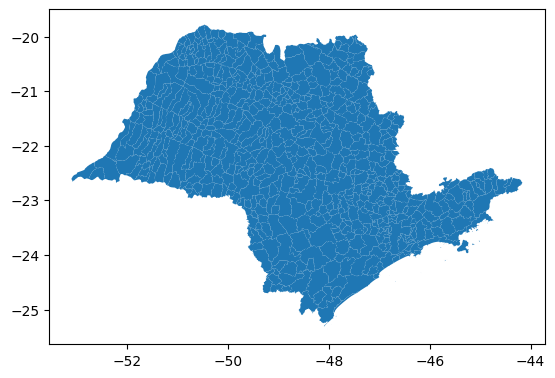

In [74]:
sp.plot()

In [ ]:
sp

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."
...,...,...,...,...,...
640,3557006,Votorantim,SP,184.186,"POLYGON ((-47.37440 -23.52042, -47.37444 -23.5..."
641,3557105,Votuporanga,SP,420.703,"POLYGON ((-50.02121 -20.33394, -50.02084 -20.3..."
642,3557154,Zacarias,SP,319.056,"POLYGON ((-49.99275 -21.03884, -49.99214 -21.0..."
643,3557204,Chavantes,SP,188.727,"POLYGON ((-49.68630 -22.93787, -49.68446 -22.9..."


In [75]:
# remover acentuacao e deixar tudo em caixa alta coluna 'NM_MUNICIP'
sp['NM_MUN'] = sp['NM_MUN'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
sp

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3500105,ADAMANTINA,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,ADOLFO,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,AGUAI,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,AGUAS DA PRATA,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,AGUAS DE LINDOIA,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."
...,...,...,...,...,...
640,3557006,VOTORANTIM,SP,184.186,"POLYGON ((-47.37440 -23.52042, -47.37444 -23.5..."
641,3557105,VOTUPORANGA,SP,420.703,"POLYGON ((-50.02121 -20.33394, -50.02084 -20.3..."
642,3557154,ZACARIAS,SP,319.056,"POLYGON ((-49.99275 -21.03884, -49.99214 -21.0..."
643,3557204,CHAVANTES,SP,188.727,"POLYGON ((-49.68630 -22.93787, -49.68446 -22.9..."


In [83]:
# adicionar colunas linguas, mat e ciencias do df no sp de acordo com o nome da cidade
sp['linguas'] = sp['NM_MUN'].map(df['linguas'])
sp['mat'] = sp['NM_MUN'].map(df['mat'])
sp['ciencias'] = sp['NM_MUN'].map(df['ciencias'])

sp = sp.dropna(subset=['linguas'])
sp = sp.dropna(subset=['mat'])
sp = sp.dropna(subset=['ciencias'])

sp

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry,linguas,mat,ciencias
0,3500105,ADAMANTINA,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4...",0.194719,0.118812,0.141914
1,3500204,ADOLFO,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2...",0.444444,0.347222,0.263889
2,3500303,AGUAI,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9...",0.220085,0.108974,0.134615
3,3500402,AGUAS DA PRATA,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8...",0.367816,0.137931,0.195402
4,3500501,AGUAS DE LINDOIA,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4...",0.389831,0.265537,0.254237
...,...,...,...,...,...,...,...,...
640,3557006,VOTORANTIM,SP,184.186,"POLYGON ((-47.37440 -23.52042, -47.37444 -23.5...",0.278568,0.161664,0.153239
641,3557105,VOTUPORANGA,SP,420.703,"POLYGON ((-50.02121 -20.33394, -50.02084 -20.3...",0.269136,0.151852,0.154938
642,3557154,ZACARIAS,SP,319.056,"POLYGON ((-49.99275 -21.03884, -49.99214 -21.0...",0.185185,0.111111,0.148148
643,3557204,CHAVANTES,SP,188.727,"POLYGON ((-49.68630 -22.93787, -49.68446 -22.9...",0.246377,0.135266,0.106280


In [92]:

sp.to_file("saresp_em.shp")

In [93]:
sp_metro = gpd.read_file('saresp_em.shp')


<Axes: >

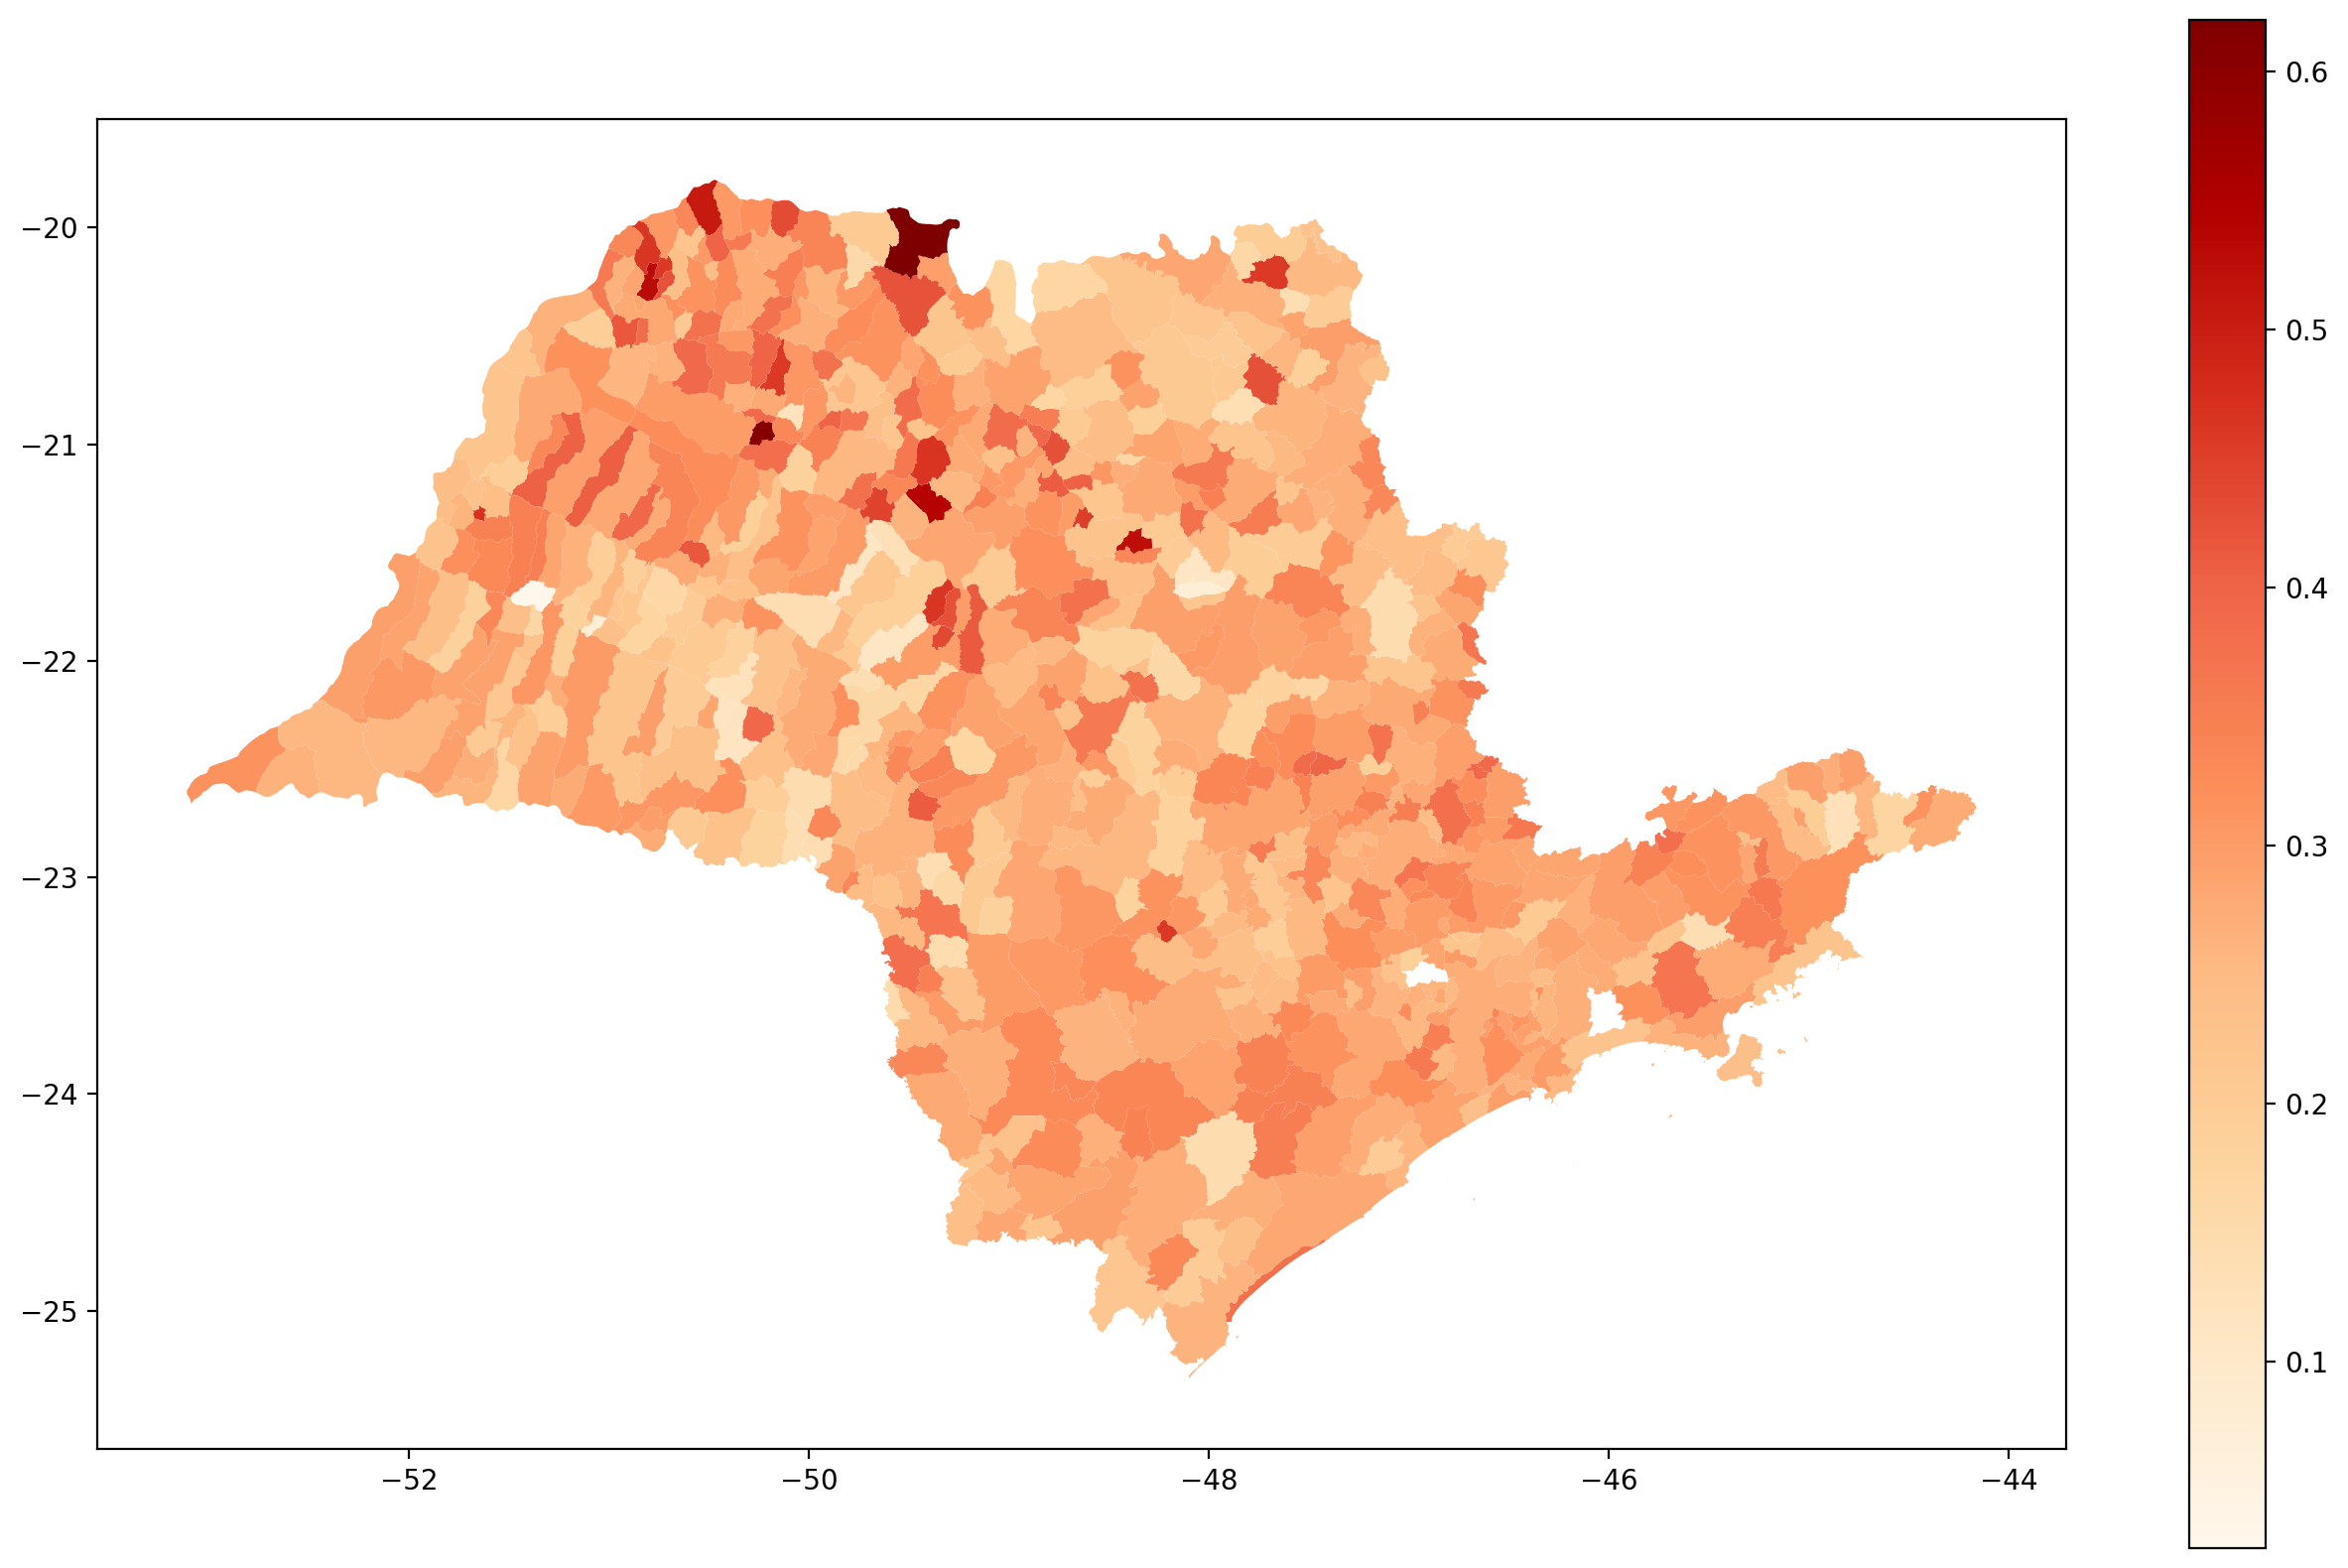

In [95]:
sp_metro.plot(column='linguas', cmap='OrRd', figsize=(16, 10), legend=True)

In [98]:
sp_metro = sp_metro.to_crs(epsg=31983)

In [148]:
# contar quantos municipios tem mais que 0.33 de proficiencia em linguas
sp_metro[sp_metro['linguas'] > 0.33]

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,linguas,mat,ciencias,geometry
1,3500204,ADOLFO,SP,211.055,0.444444,0.347222,0.263889,"POLYGON ((16167.106 7648225.443, 16330.817 764..."
3,3500402,AGUAS DA PRATA,SP,142.673,0.367816,0.137931,0.195402,"POLYGON ((320664.462 7586207.973, 320737.239 7..."
4,3500501,AGUAS DE LINDOIA,SP,60.126,0.389831,0.265537,0.254237,"POLYGON ((334715.729 7517393.900, 334992.389 7..."
6,3500600,AGUAS DE SAO PEDRO,SP,3.612,0.347222,0.250000,0.222222,"POLYGON ((205656.988 7497768.539, 205693.002 7..."
21,3501905,AMPARO,SP,445.323,0.378136,0.228495,0.226703,"POLYGON ((315681.841 7505686.541, 315695.204 7..."
...,...,...,...,...,...,...,...,...
621,3555703,UNIAO PAULISTA,SP,79.056,0.400000,0.066667,0.133333,"POLYGON ((-3334.422 7686890.438, -3327.913 768..."
623,3555901,URU,SP,146.901,0.425926,0.314815,0.333333,"POLYGON ((61182.566 7597384.190, 61143.499 759..."
626,3556206,VALINHOS,SP,148.538,0.369340,0.219313,0.250409,"POLYGON ((297484.462 7465568.838, 297564.702 7..."
635,3556909,VISTA ALEGRE DO ALTO,SP,95.429,0.403101,0.313953,0.395349,"POLYGON ((122044.817 7658092.212, 122186.964 7..."


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000022DBCF1C360>

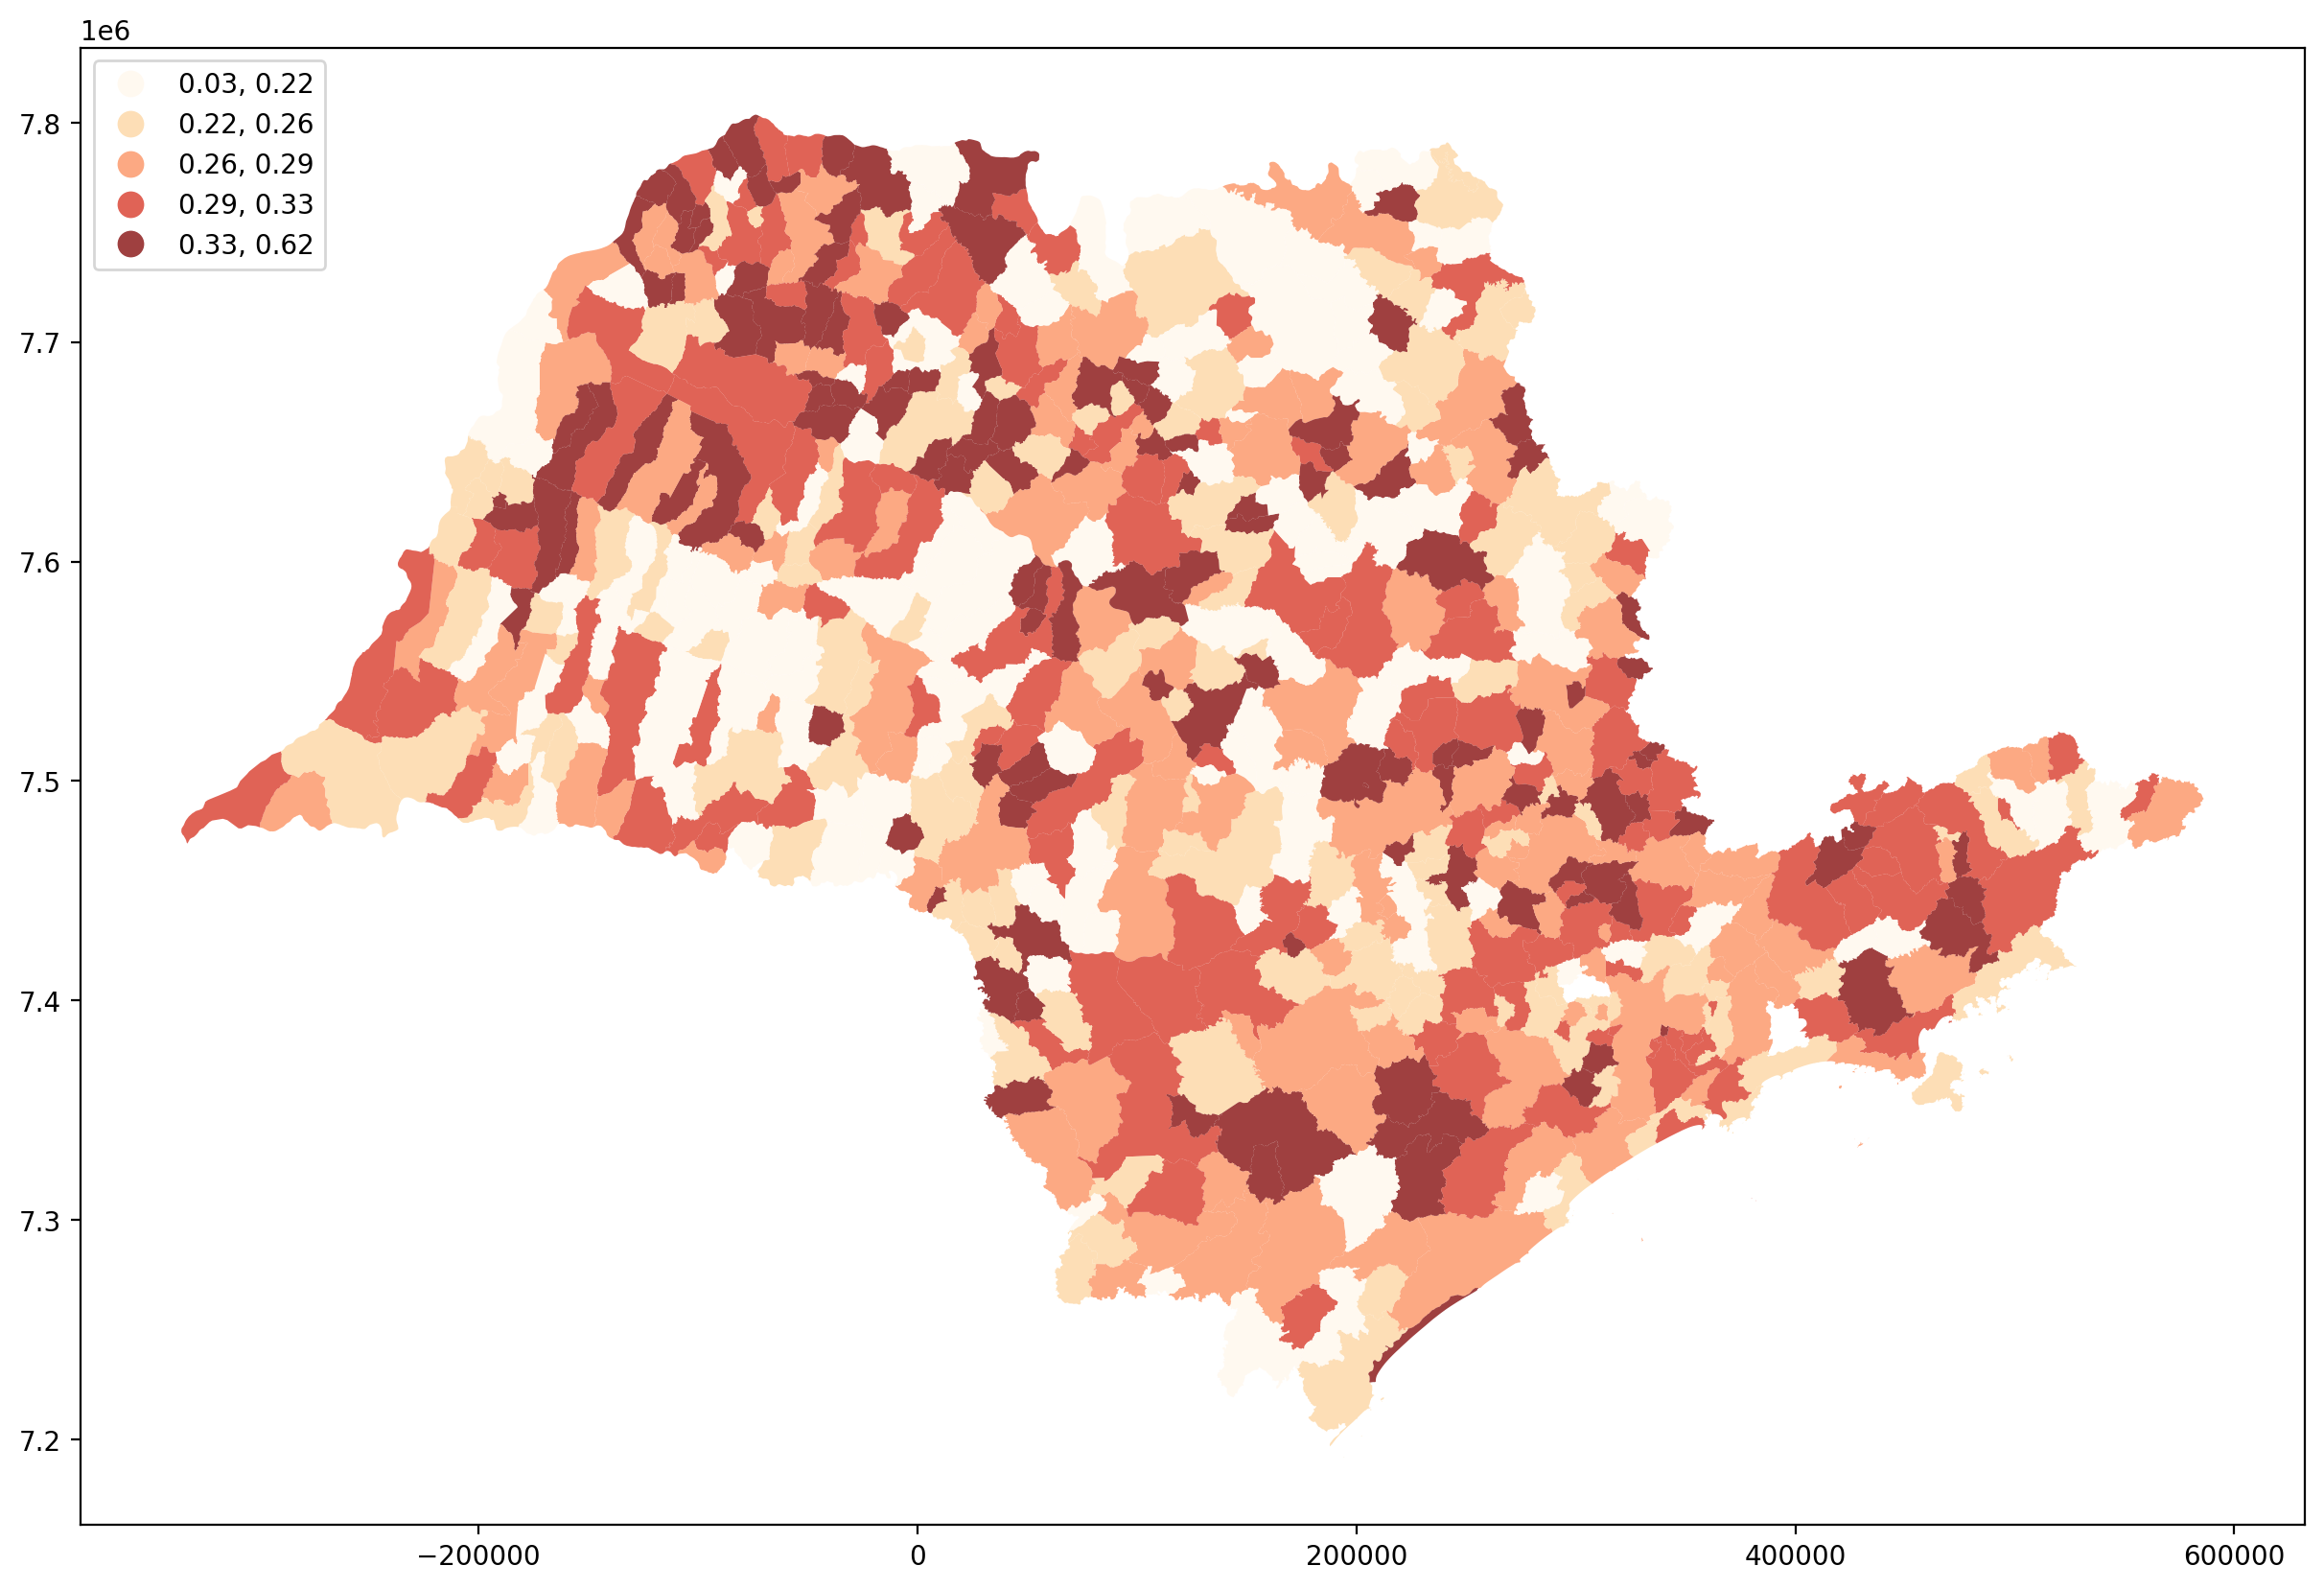

In [99]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import contextily
f, ax = plt.subplots(1, figsize=(20,10))
sp_metro.plot(column = 'linguas',
        cmap = 'OrRd',
        scheme = 'quantiles',
        k = 5,
        edgecolor = 'white',
        linewidth=0.,
        alpha=0.75,
        legend=True,
        legend_kwds={'loc':2},
        ax = ax)

contextily.add_basemap(ax,
                       crs=sp_metro.crs,

                      )

In [100]:
sp_metro.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Linguas

In [101]:
from pysal.lib import weights
from esda.moran import Moran
w = weights.KNN.from_dataframe(sp_metro, k = 4)
w.transform = 'R'
moran = Moran(sp_metro['linguas'], w)

In [102]:
from esda.moran import Moran_Local
moran_loc = Moran_Local(sp_metro['linguas'], w)

In [103]:
moran.I

0.17786163589597437

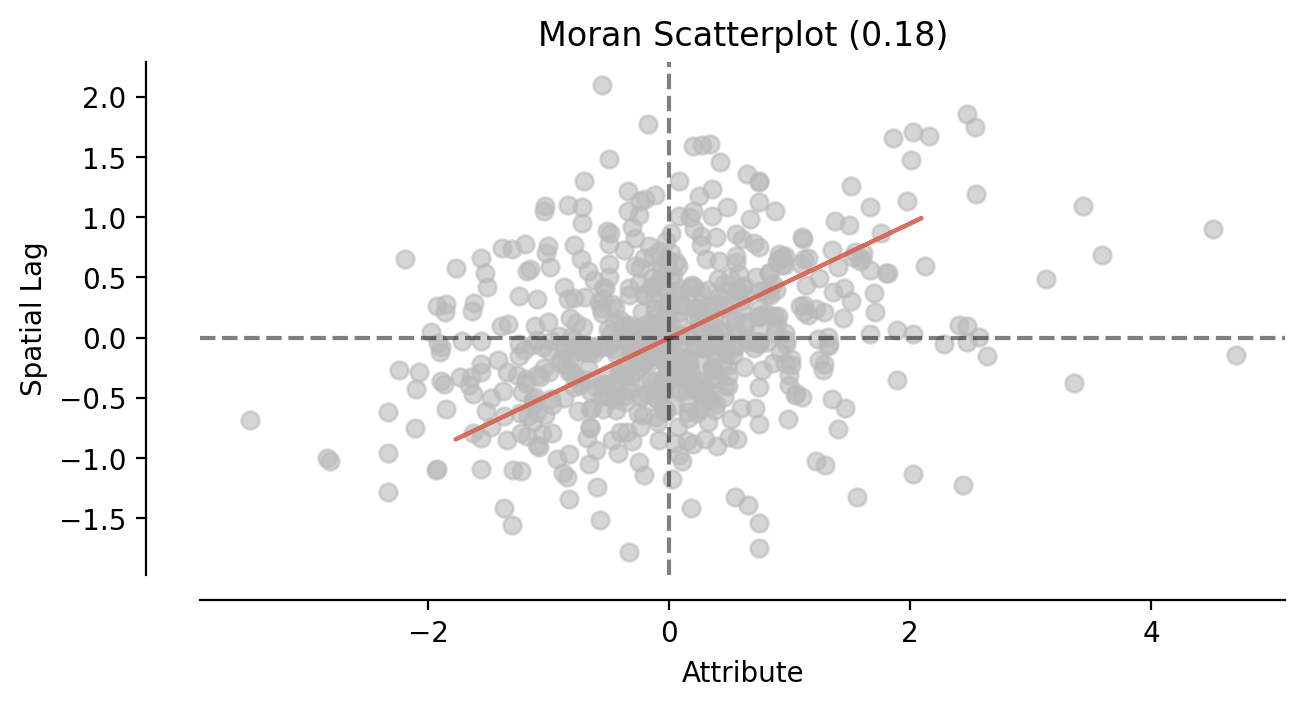

In [104]:
from matplotlib import pyplot as plt
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

In [89]:
from esda.moran import Moran_Local

In [105]:
moran_loc = Moran_Local(sp_metro['linguas'], w)

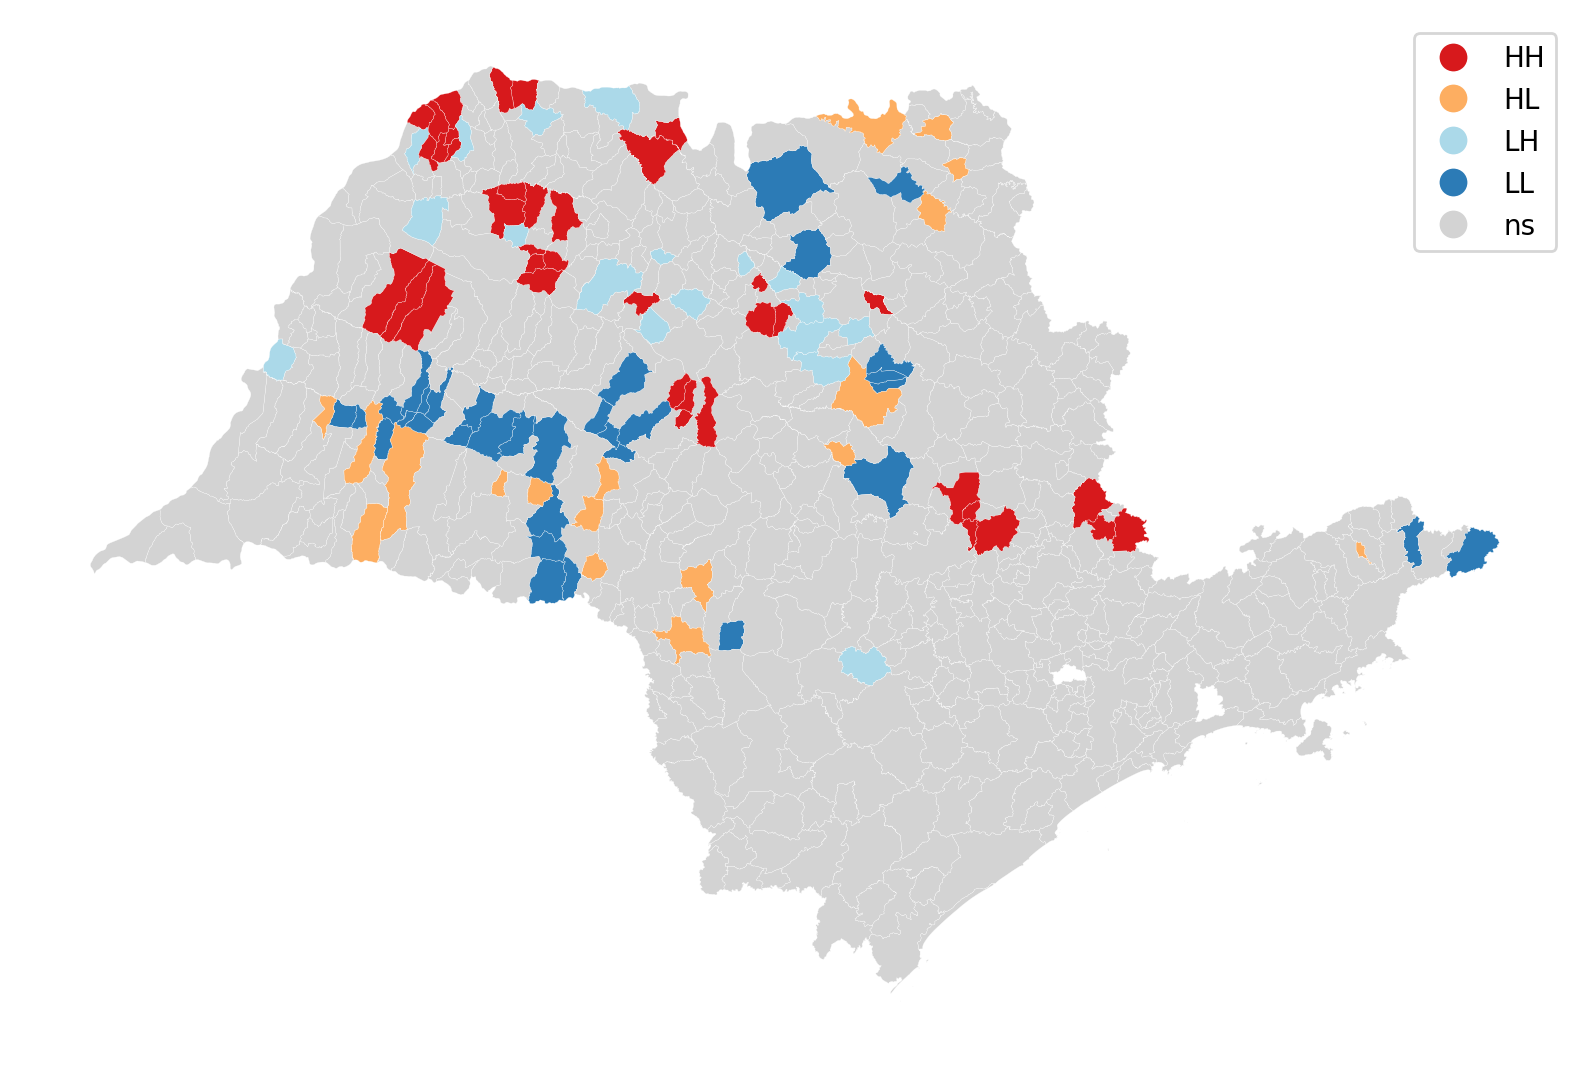

In [106]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, sp_metro, p=0.05, figsize = (10,10))
plt.show()

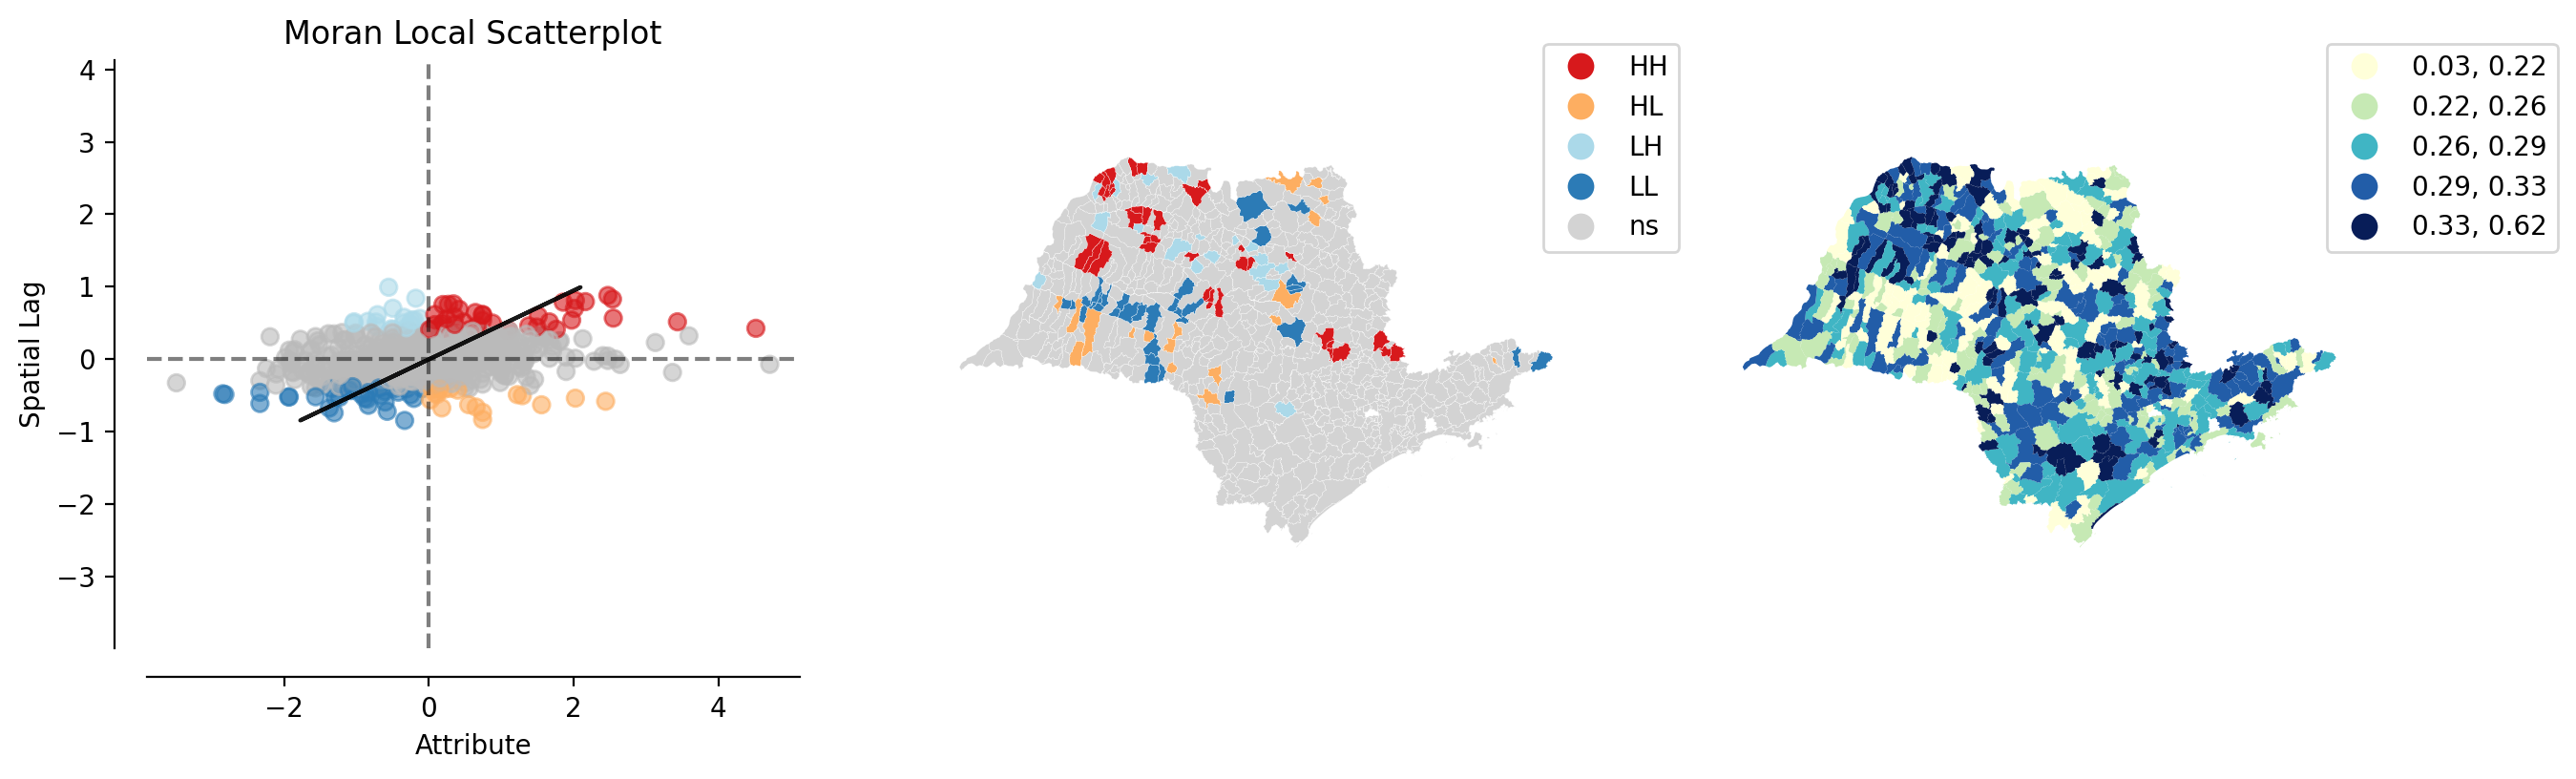

In [107]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, sp_metro,
                           'linguas')
plt.show()

# Matemática	

In [108]:
moran = Moran(sp_metro['mat'], w)

In [109]:
moran_loc = Moran_Local(sp_metro['mat'], w)

In [110]:
moran.I

0.1907256611290029

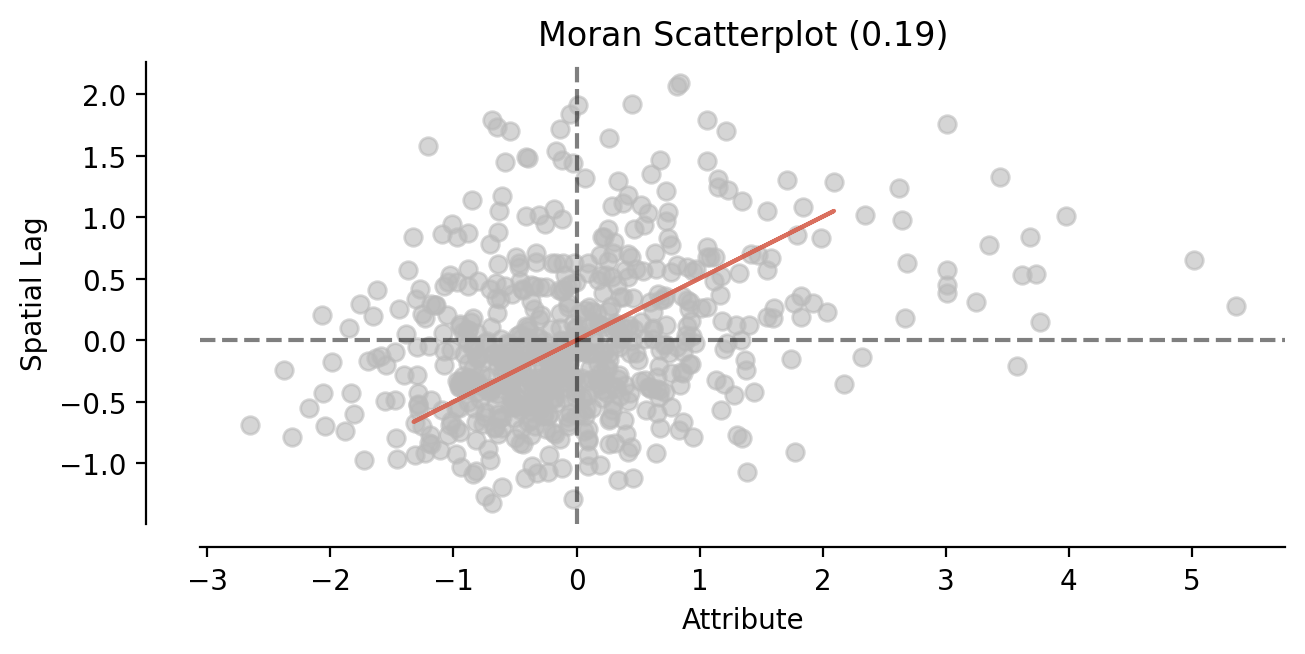

In [111]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

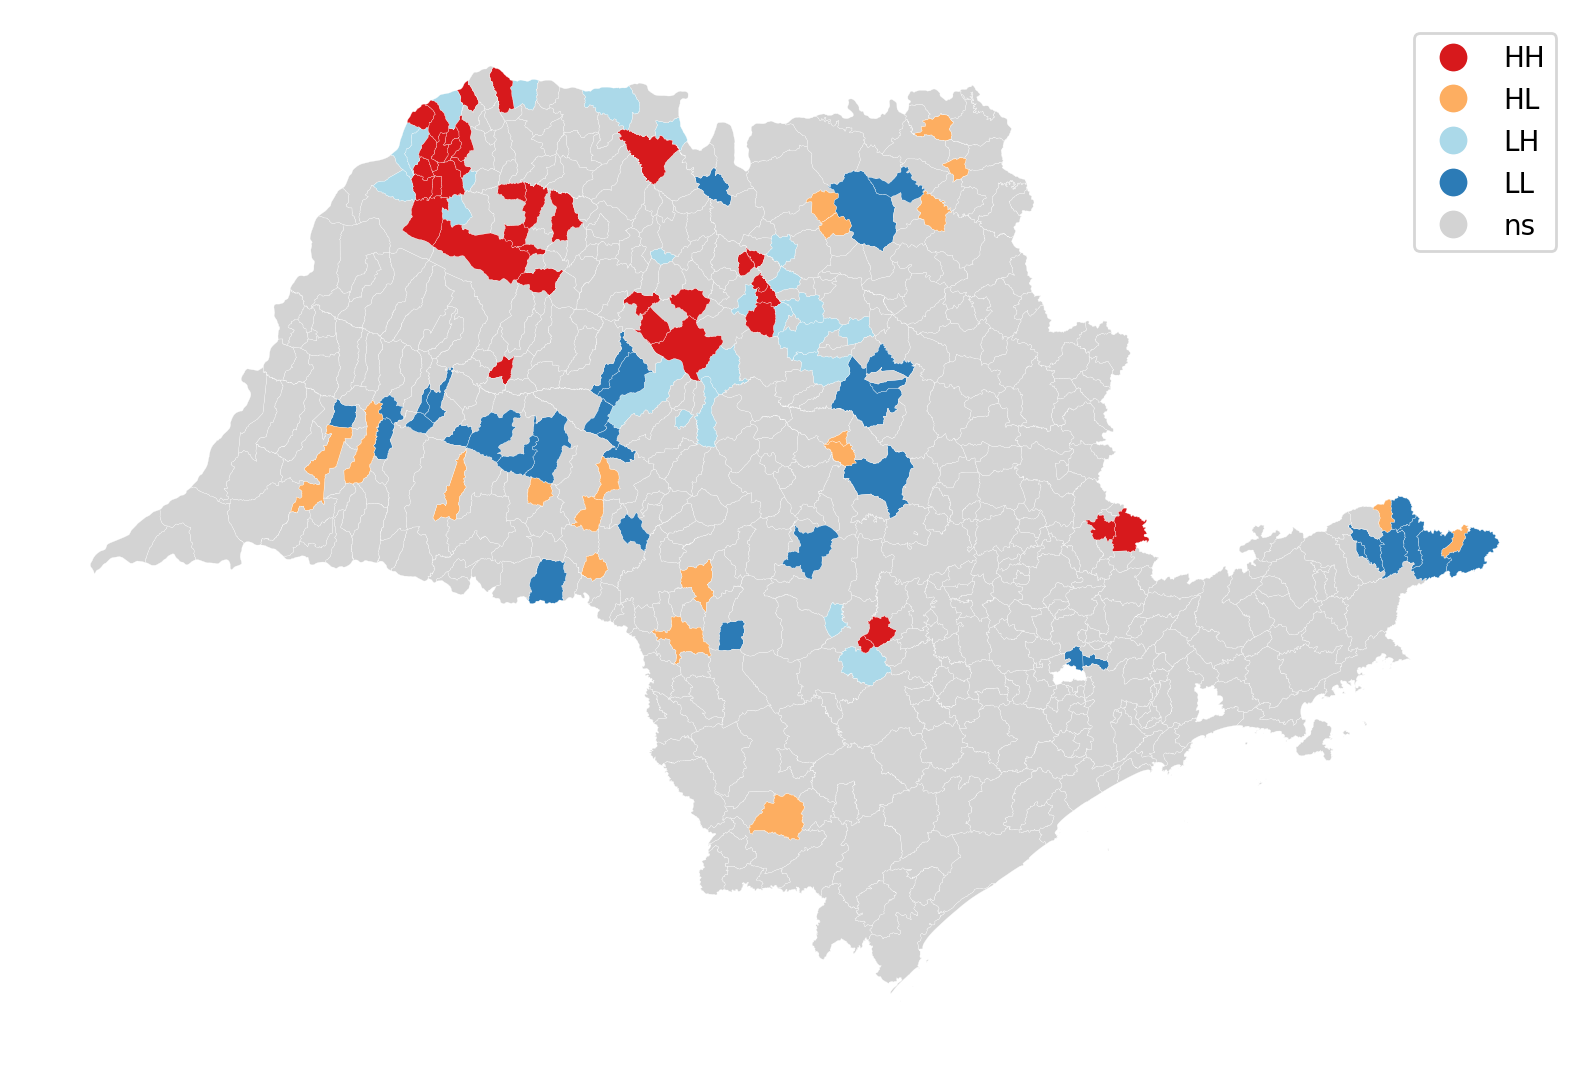

In [112]:
moran_loc = Moran_Local(sp_metro['mat'], w)
lisa_cluster(moran_loc, sp_metro, p=0.05, figsize = (10,10))
plt.show()

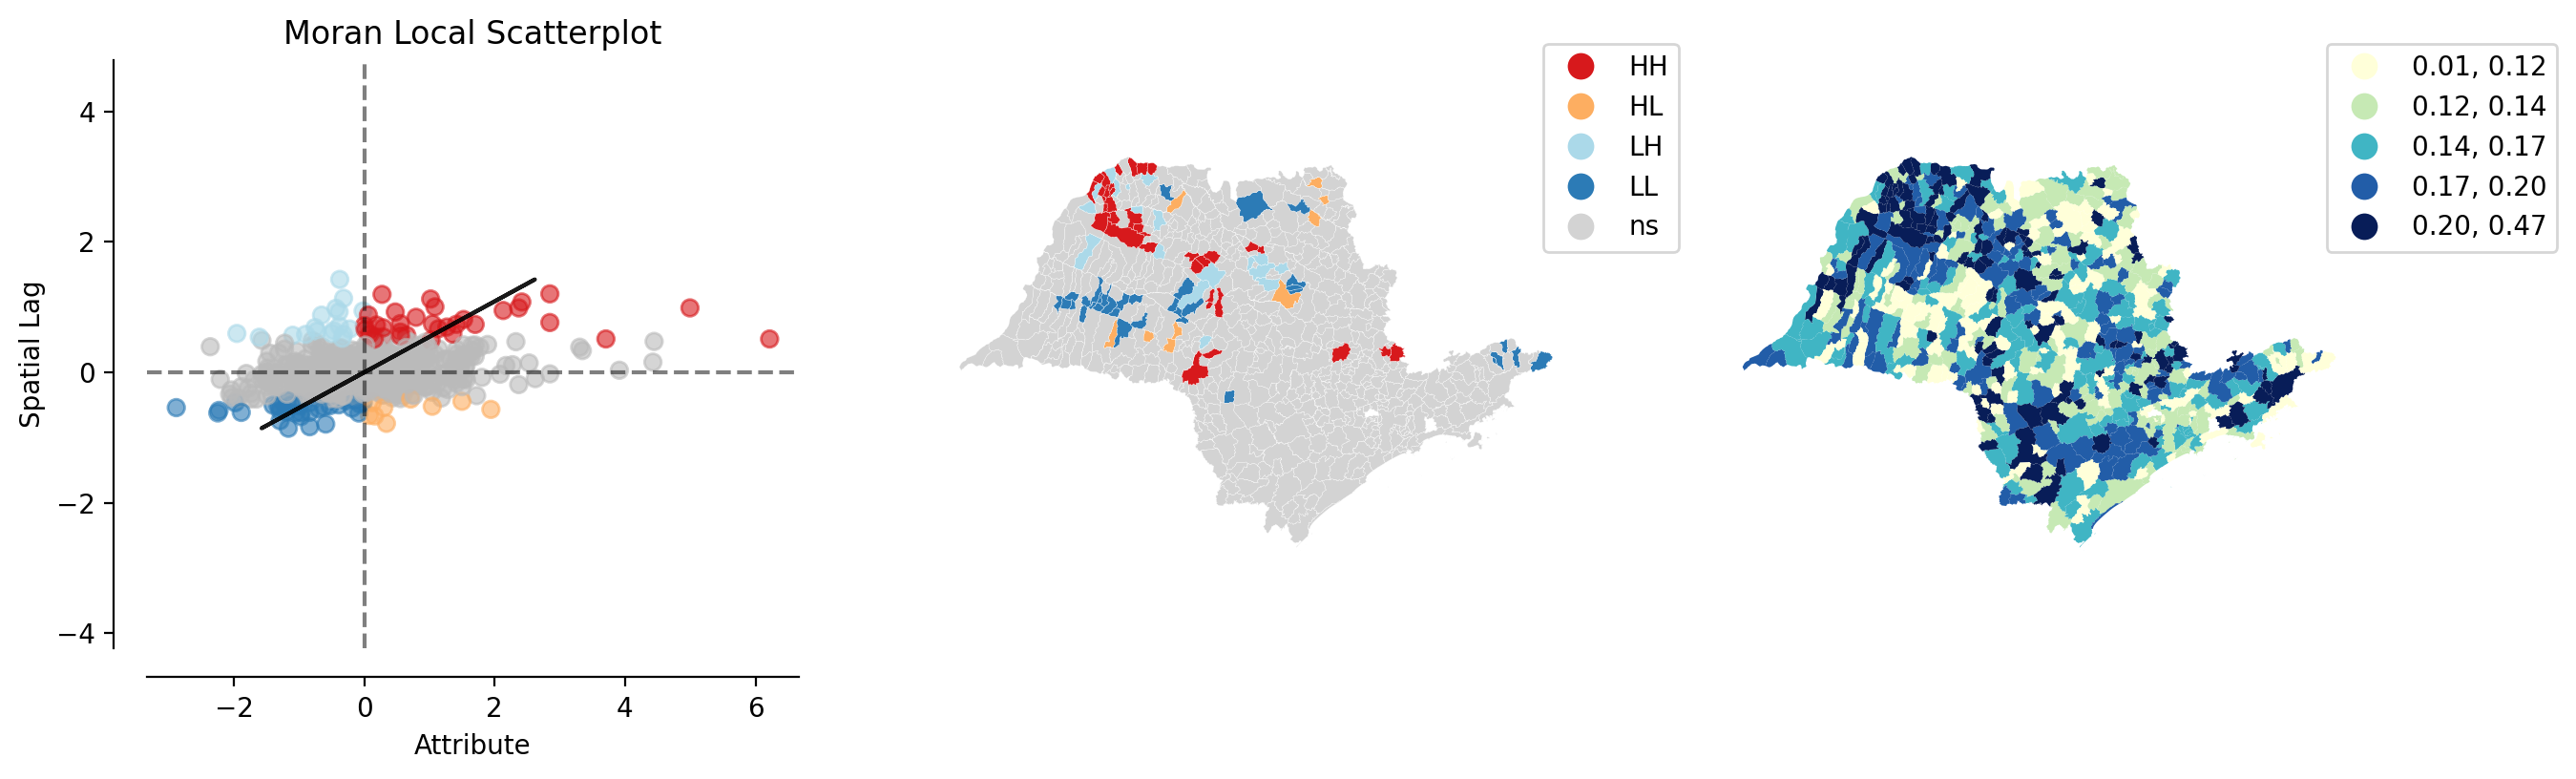

In [129]:
plot_local_autocorrelation(moran_loc, sp_metro,
                           'mat')
plt.show()

## Ciencias

In [131]:
moran = Moran(sp_metro['ciencias'], w)

In [132]:
moran_loc = Moran_Local(sp_metro['ciencias'], w)

In [133]:
moran.I

0.20637972538217852